In [8]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import sklearn as sk

from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

In [3]:
reci = pd.read_csv('Cupcakes vs Muffins.csv')

In [31]:
reci

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


In [16]:
print(sns.__version__)

0.13.2


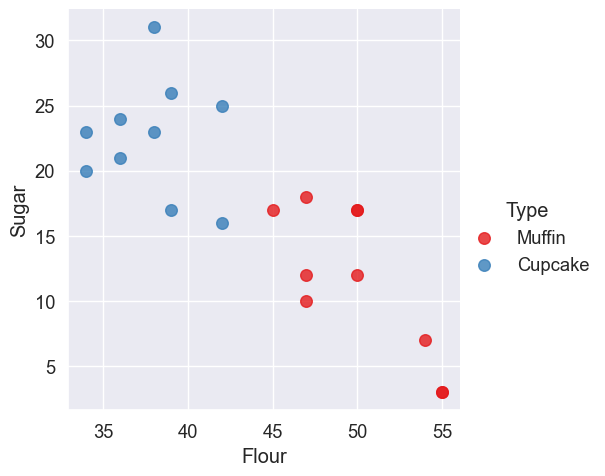

In [17]:
sns.lmplot(x='Flour', y='Sugar', data=reci, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={'s':70});

In [28]:
#foramt  data
type_label = np.where(reci['Type']=='muffin',0,1)
recipe_feature= reci.columns.values[1:].tolist()
recipe_feature
ingredients= reci[['Flour','Sugar']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [35]:
type_label = np.where(reci['Type'] == 'Muffin', 0,
                      np.where(reci['Type'] == 'Cupcake', 1, -1))


In [36]:
np.unique(type_label)

array([0, 1])

In [37]:
#fit model
model= svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [40]:
#seperating hyperplane
w=model.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(30,60)
yy=a*xx-(model.intercept_[0])/w[1]

#plot the parallels to the seperating hyperplane that pass through the support vectors
b=model.support_vectors_[0]
yy_down=a*xx+(b[1]-a*b[0])
b=model.support_vectors_[-1]
yy_up=a * xx +(b[1]-a*b[0])


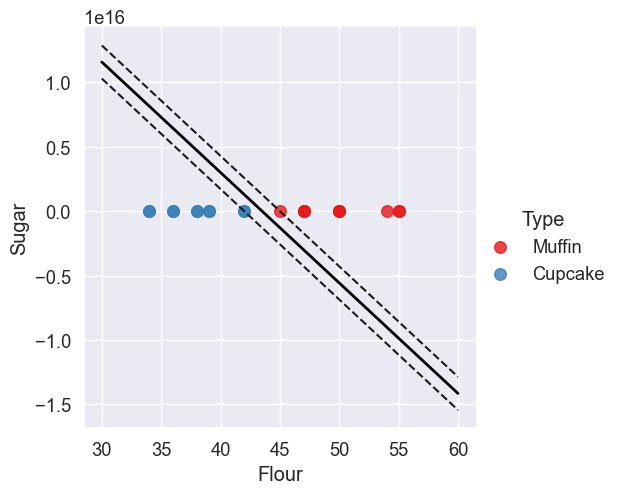

In [44]:
sns.lmplot(x='Flour', y='Sugar', data=reci, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={'s':70});
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')

In [46]:
#creating a function for muffin or cupcake
def muffin_or_cupcake(flour,sugar):
    if(model.predict([[flour,sugar]]))==0:
        print("You are looking at a muffin receipe!")
    else:
        print("You are looking at a cupcake receipe!")

#prediction with providing flour and sugar values
muffin_or_cupcake(50,20)

You are looking at a muffin receipe!


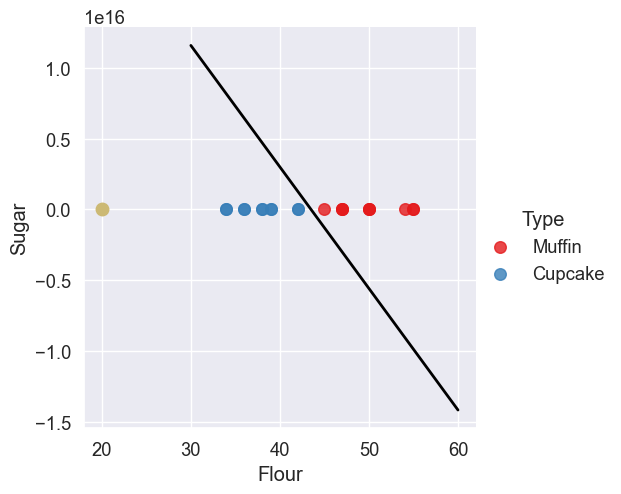

In [49]:
sns.lmplot(x='Flour', y='Sugar', data=reci, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={'s':70});
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(20,50,'yo',markersize='9')